# Covid-19 Prediction Using Chest X-Ray Images via CNN

# Normal Chest X-ray images from Kaggle.

https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


# Covid-19 Chest X-Ray Images.

https://github.com/ieee8023/covid-chestxray-dataset

In [7]:
import os
import random
import splitfolders
import shutil as sl
#import cv2
#import PIL
from PIL import Image
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [12]:
#Load covid dataset from github.

covid_dataset = "images"
info_file = "metadata.csv"

df = pd.read_csv(info_file)  #Read csv file.
pd.set_option('display.max_columns', None) #To display all the columns.

df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [13]:
print(df.shape)

(950, 30)


In [19]:
target = "Dataset/covid"  #Create a directory to store our positive samples.

os.mkdir("Dataset")

if os.path.exists(target):
    pass
else:
    os.mkdir(target)
    print(target, "created.")
    

Dataset/covid created.


In [35]:
#Extract the positive samples from covid dataset and store it in our target.

count = 0

#We take only the posteroanterior (PA) view of chest images.

for (line,row) in df.iterrows():
    if row["finding"] == "Pneumonia/Viral/COVID-19" and row["view"] == "PA":  
        file = row["filename"]
        source_path = os.path.join(covid_dataset,file)
        target_path = os.path.join(target, file)
        sl.copy2(source_path,target_path)
        print("copied done ",count)
        
        count += 1

copied done  0
copied done  1
copied done  2
copied done  3
copied done  4
copied done  5
copied done  6
copied done  7
copied done  8
copied done  9
copied done  10
copied done  11
copied done  12
copied done  13
copied done  14
copied done  15
copied done  16
copied done  17
copied done  18
copied done  19
copied done  20
copied done  21
copied done  22
copied done  23
copied done  24
copied done  25
copied done  26
copied done  27
copied done  28
copied done  29
copied done  30
copied done  31
copied done  32
copied done  33
copied done  34
copied done  35
copied done  36
copied done  37
copied done  38
copied done  39
copied done  40
copied done  41
copied done  42
copied done  43
copied done  44
copied done  45
copied done  46
copied done  47
copied done  48
copied done  49
copied done  50
copied done  51
copied done  52
copied done  53
copied done  54
copied done  55
copied done  56
copied done  57
copied done  58
copied done  59
copied done  60
copied done  61
copied done  62
co

In [27]:
#Create a directory under Dataset to store our normal sample.

kaggle_path = "chest_xray/train/NORMAL"

target2 = "Dataset/normal"

if not os.path.exists(target2):
    os.mkdir(target2)
    print(target2, "created.")
    
else:
    print(target2, "already exists.")

Dataset/normal already exists.


In [33]:
#Randomly choose 196 normal samples from Kaggle dataset. We have more than 1342 images.

normal_images = os.listdir(kaggle_path)

list_total = len(normal_images)
print(list_total)

1342


In [40]:
#Randomly choose 196 normal samples from Kaggle dataset.

random.shuffle(normal_images)

for i in range(196):
    
    normal_image = normal_images[i]
    source_path2 = os.path.join(kaggle_path,normal_image)
    target_path2 = os.path.join(target2,normal_image)
    sl.copy2(source_path2,target_path2)
    
    print("Copying ", i)   

Copying  0
Copying  1
Copying  2
Copying  3
Copying  4
Copying  5
Copying  6
Copying  7
Copying  8
Copying  9
Copying  10
Copying  11
Copying  12
Copying  13
Copying  14
Copying  15
Copying  16
Copying  17
Copying  18
Copying  19
Copying  20
Copying  21
Copying  22
Copying  23
Copying  24
Copying  25
Copying  26
Copying  27
Copying  28
Copying  29
Copying  30
Copying  31
Copying  32
Copying  33
Copying  34
Copying  35
Copying  36
Copying  37
Copying  38
Copying  39
Copying  40
Copying  41
Copying  42
Copying  43
Copying  44
Copying  45
Copying  46
Copying  47
Copying  48
Copying  49
Copying  50
Copying  51
Copying  52
Copying  53
Copying  54
Copying  55
Copying  56
Copying  57
Copying  58
Copying  59
Copying  60
Copying  61
Copying  62
Copying  63
Copying  64
Copying  65
Copying  66
Copying  67
Copying  68
Copying  69
Copying  70
Copying  71
Copying  72
Copying  73
Copying  74
Copying  75
Copying  76
Copying  77
Copying  78
Copying  79
Copying  80
Copying  81
Copying  82
Copying  83
Co

In [50]:
# Create a folder Dataset2 to store our train and validation split.

input_dir = "Dataset"
out_dir = "Dataset2"

if not os.path.exists(out_dir):
    os.mkdir(out_dir)
    print(out_dir, "Created!")
else:
    print(out_dir, "Already exists!")

Dataset2 Created!


In [51]:
# Split our dataset into 80% training and 20% validation.

"""
!pip install split-folders
"""

splitfolders.ratio(input_dir,output=out_dir,
                  seed=42, ratio=(.8,.2),
                  group_prefix=None) 
if os.path.exists("Dataset2/train" and "Dataset2/val"):
    print("train and val datasets created!")

train and val datasets created!


# Normalize and rescale our data.


In [8]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

val_datagen = image.ImageDataGenerator(rescale = 1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
     'Dataset2/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 312 images belonging to 2 classes.


In [61]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [10]:
val_generator = val_datagen.flow_from_directory(
     'Dataset2/val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [68]:
"""
im = cv2.imread('Dataset2/train/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg')

print(type(im))

print(im.shape)
print(type(im.shape))
"""

<class 'numpy.ndarray'>
(1148, 2563, 3)
<class 'tuple'>


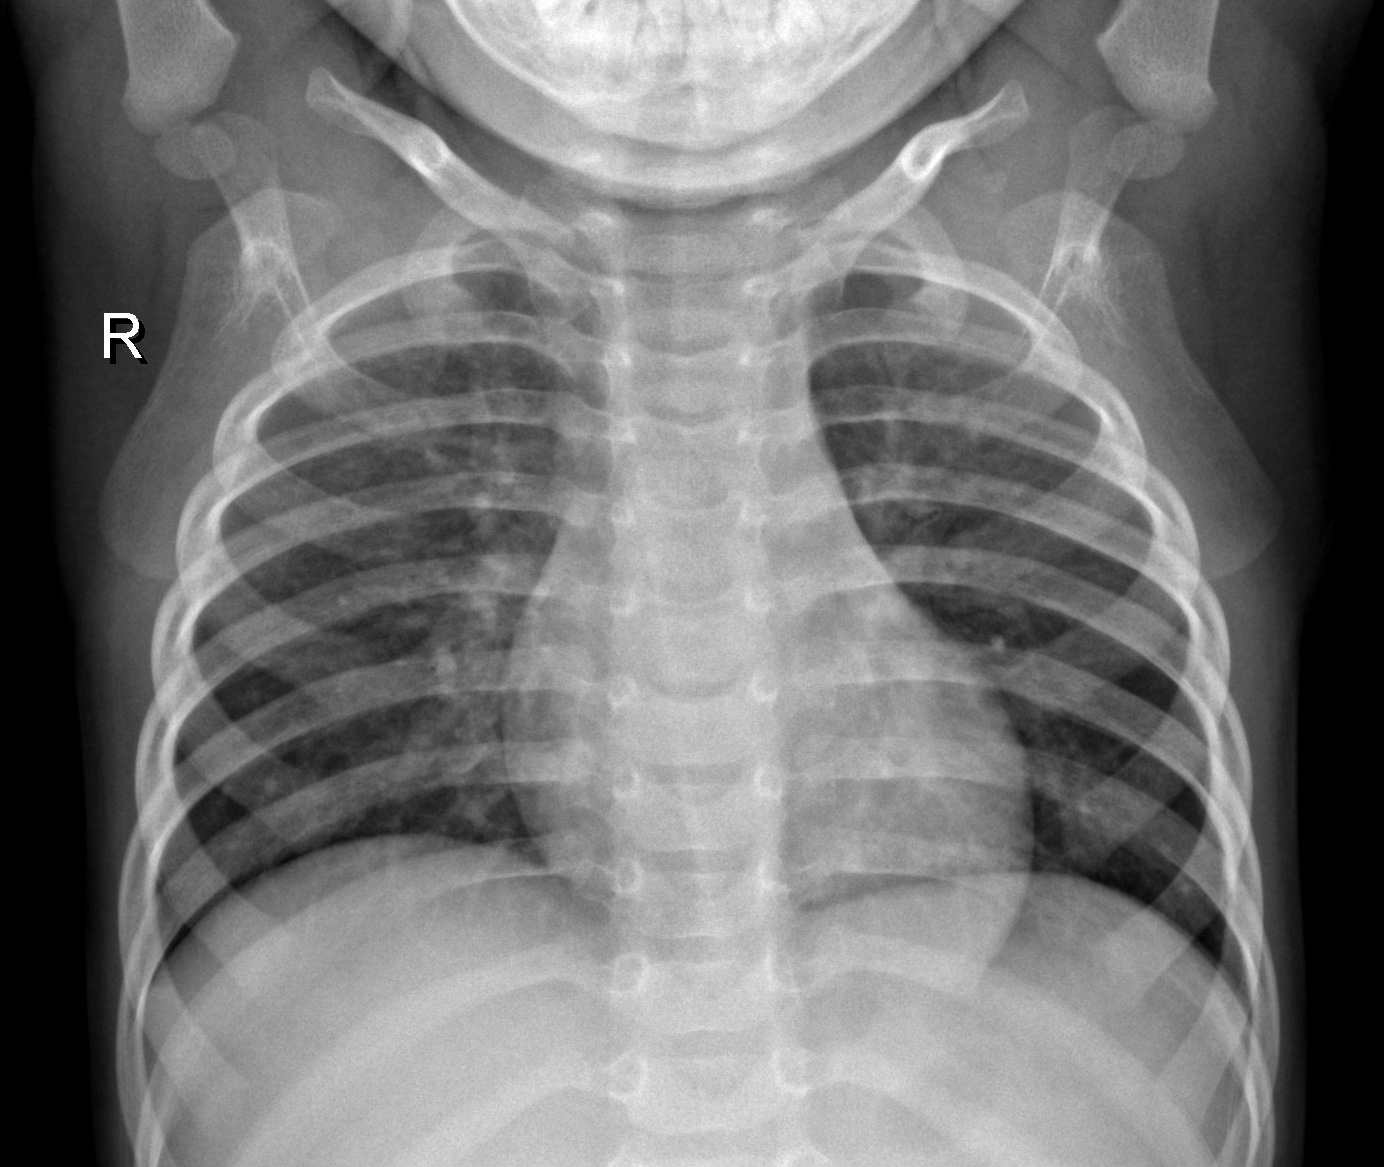

In [69]:
"""
import PIL

PIL.Image.open("Dataset2/train/normal/IM-0129-0001.jpeg")
"""

In [11]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

2022-05-18 15:49:48.200514: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2022-05-18 15:49:48.200601: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: jarvis
2022-05-18 15:49:48.200619: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: jarvis
2022-05-18 15:49:48.200852: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.73.5
2022-05-18 15:49:48.200913: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.68.2
2022-05-18 15:49:48.200929: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 510.68.2 does not match DSO version 510.73.5 -- cannot find working devices in this configuration
2022-05-18 15:49:48.201726: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow bin

In [12]:
# Fit the model
hist = model.fit(train_generator,
                        epochs=10,
                        steps_per_epoch=len(train_generator),
                        validation_data=val_generator,
                        validation_steps=len(val_generator))

Epoch 1/10
10/10 [==============================] - 6s 567ms/step - loss: 0.4716 - accuracy: 0.7821 - val_loss: 0.1706 - val_accuracy: 0.9625
Epoch 2/10
10/10 [==============================] - 5s 498ms/step - loss: 0.2785 - accuracy: 0.8846 - val_loss: 0.0958 - val_accuracy: 0.9625
Epoch 3/10
10/10 [==============================] - 5s 494ms/step - loss: 0.2089 - accuracy: 0.9167 - val_loss: 0.0780 - val_accuracy: 0.9625
Epoch 4/10
10/10 [==============================] - 5s 487ms/step - loss: 0.1475 - accuracy: 0.9455 - val_loss: 0.1284 - val_accuracy: 0.9750
Epoch 5/10
10/10 [==============================] - 5s 494ms/step - loss: 0.1065 - accuracy: 0.9647 - val_loss: 0.0784 - val_accuracy: 0.9625
Epoch 6/10
10/10 [==============================] - 5s 494ms/step - loss: 0.0988 - accuracy: 0.9744 - val_loss: 0.0897 - val_accuracy: 0.9625
Epoch 7/10
10/10 [==============================] - 5s 491ms/step - loss: 0.0556 - accuracy: 0.9808 - val_loss: 0.0780 - val_accuracy: 0.9625
Epoch 